<a href="https://colab.research.google.com/github/MididoddiSindhu05/Image-Denoising/blob/main/Using%20RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import wiener

# Image size
height, width = 512, 1024

# Load bands
band1 = np.fromfile('/content/band1_image2.rad', dtype=np.uint8).reshape((height, width))
band2 = np.fromfile('/content/band2_image2.rad', dtype=np.uint8).reshape((height, width))
band3 = np.fromfile('/content/band3_image2.rad', dtype=np.uint8).reshape((height, width))

# Stack to RGB
rgb_image = np.stack([band1, band2, band3], axis=-1)


In [22]:
r1 = cv2.bilateralFilter(band1, 5, 25, 25)
g1 = cv2.bilateralFilter(band2, 5, 25, 25)
b1 = cv2.bilateralFilter(band3, 5, 25, 25)
denoised_bilateral = cv2.merge([r1, g1, b1])


In [23]:
r2 = cv2.medianBlur(band1, 3)
g2 = cv2.medianBlur(band2, 3)
b2 = cv2.medianBlur(band3, 3)
denoised_median = cv2.merge([r2, g2, b2])


In [24]:
r3 = cv2.GaussianBlur(band1, (3, 3), 0)
g3 = cv2.GaussianBlur(band2, (3, 3), 0)
b3 = cv2.GaussianBlur(band3, (3, 3), 0)
denoised_gaussian = cv2.merge([r3, g3, b3])


In [25]:
r4 = wiener(band1, (5, 5)).astype(np.uint8)
g4 = wiener(band2, (5, 5)).astype(np.uint8)
b4 = wiener(band3, (5, 5)).astype(np.uint8)
denoised_wiener = cv2.merge([r4, g4, b4])


/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1673: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/tmp/ipython-input-25-196675967.py:1: RuntimeWarning: invalid value encountered in cast
  r4 = wiener(band1, (5, 5)).astype(np.uint8)


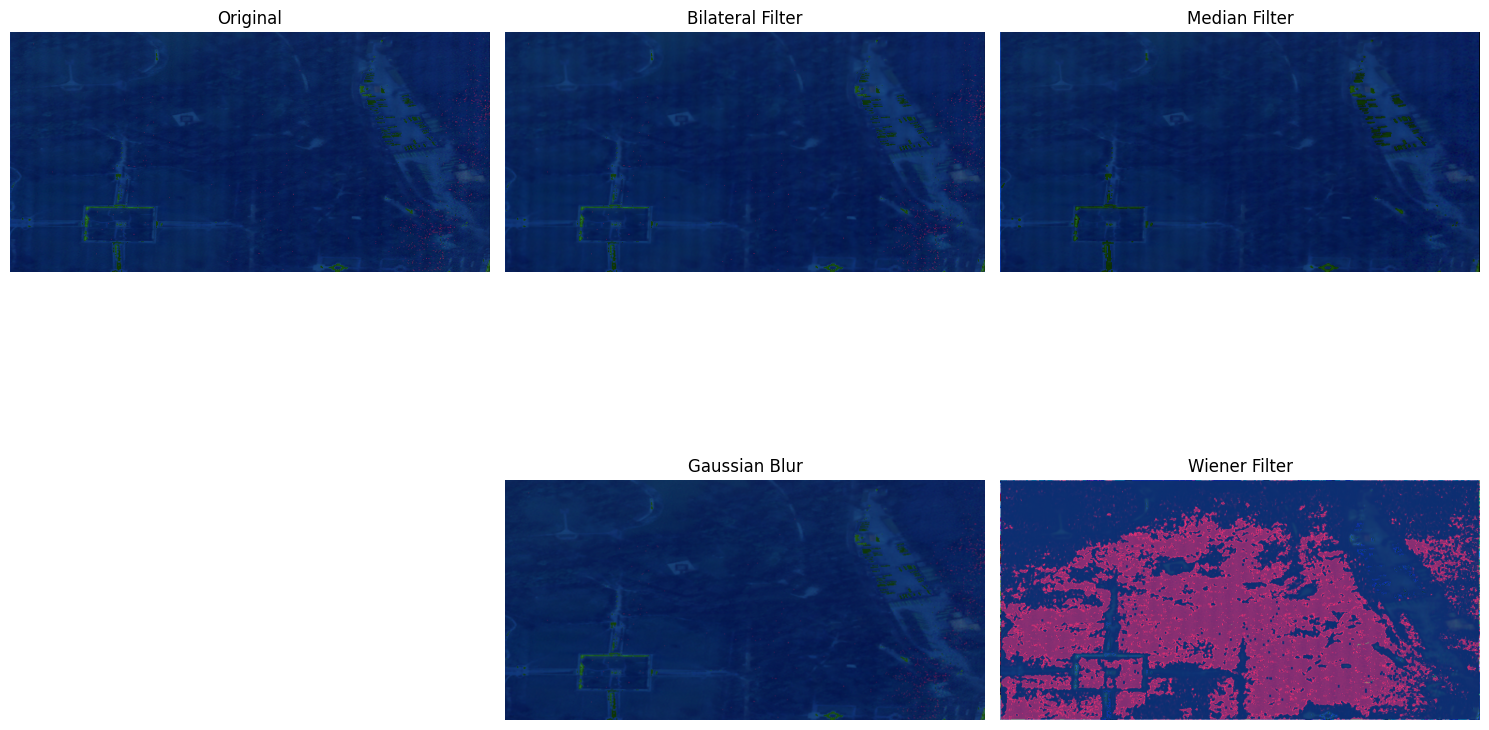

In [26]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(rgb_image)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(denoised_bilateral)
plt.title('Bilateral Filter')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(denoised_median)
plt.title('Median Filter')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(denoised_gaussian)
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(denoised_wiener)
plt.title('Wiener Filter')
plt.axis('off')

plt.tight_layout()
plt.show()
